# Bandit Algorithms

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
class BanditAlgorithm:

    def __init__(self, algorithm, reward_dists):
        self.arm_value_estimates = {arm: 0 for arm in reward_dists}
        self.arm_counts = {arm: 0 for arm in reward_dists}
        self.reward_dists = reward_dists
        self.algorithm = algorithm

    def __call__(self, n_steps):
        actions = []
        rewards = []
        for step in range(n_steps):

            # policy - choose arm to pull and get reward
            action, reward = self.algorithm(self.arm_value_estimates, self.arm_counts, self.reward_dists)

            # perform updates    
            self.arm_value_estimates[action] = (self.arm_counts[action] * self.arm_value_estimates[action] + reward) / (self.arm_counts[action] + 1)
            self.arm_counts[action] += 1

            # track actions and rewards
            actions.append(action)
            rewards.append(reward)

        return actions, rewards         

Have implemented:
- Greedy
- Epsilon greedy
- Policy gradient
- UCB

In [93]:
class Greedy:

    def __call__(self, arm_value_estimates, arm_counts, reward_dists):
        action_idx = np.array(arm_value_estimates.values())
        action = list(arm_value_estimates.keys())[action_idx]
        reward = reward_dists[action]()
        return action, reward
    

class EpsilonGreedy:

    def __init__(self, eps):
        self.eps = eps

    def __call__(self, arm_value_estimates, arm_counts, reward_dists):
        if np.random.rand() < self.eps:
            action = list(arm_value_estimates.keys())[np.random.randint(0, len(arm_value_estimates.keys()))]
        else:
            action_idx = np.array(arm_value_estimates.values())
            action = list(arm_value_estimates.keys())[action_idx]
        reward = reward_dists[action]()
        return action, reward
    
class PolicyGradient:

    def __init__(self, alpha, n_arms):
        self.alpha = alpha
        self.preferences = np.ones(shape=(n_arms,))
        self.probs = np.exp(self.preferences) / np.exp(self.preferences).sum()

    def __call__(self, arm_value_estimates, arm_counts, reward_dists):
        action_idx = np.random.multinomial(1, self.probs).argmax()
        action = list(arm_value_estimates.keys())[action_idx]
        reward = reward_dists[action]()

        update = -1 * self.alpha * reward * self.probs
        update[action_idx] = self.alpha * reward * (1 - self.probs[action_idx])
        self.preferences += update
        self.probs = np.exp(self.preferences) / np.exp(self.preferences).sum()

        return action, reward
    
class UCB:

    def __init__(self, alpha):
        self.alpha = alpha

    def __call__(self, arm_value_estimates, arm_counts, reward_dists):
        t = np.sum(arm_counts.values())
        ns = np.array(list(arm_counts.values()))
        ns = np.where(ns == 0, 0.01, ns)
        us = (1 / (2 * ns))
        upper_bounds = np.array(list(arm_value_estimates.values())) + self.alpha * us
        action_idx = upper_bounds.argmax()
        action = list(arm_value_estimates.keys())[action_idx]
        reward = reward_dists[action]()
        return action, reward


In [94]:
gen = np.random.default_rng()
basic_bandit = {i: (lambda i=i: gen.normal(loc=i, scale=1)) for i in range(-5,6)}

In [95]:
n_arms = len(basic_bandit.keys())
greedy_alg = BanditAlgorithm(Greedy(), basic_bandit)
eps_greedy_alg = BanditAlgorithm(EpsilonGreedy(0.01), basic_bandit)
pg_alg = BanditAlgorithm(PolicyGradient(0.01, n_arms), basic_bandit)
ucb_alg = BanditAlgorithm(UCB(0.5), basic_bandit)

/tmp/ipykernel_690/3686508860.py:52: RuntimeWarning: divide by zero encountered in divide
  us = (1 / (2 * ns))


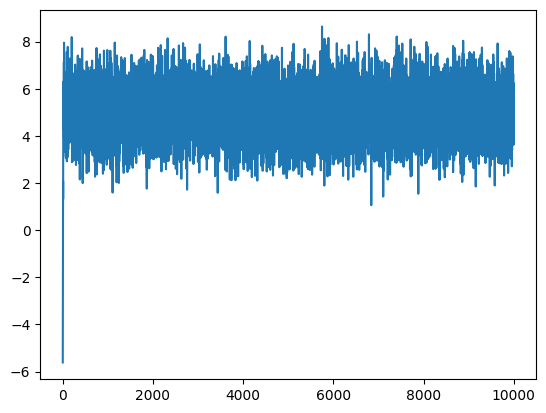

In [96]:
actions, rewards = ucb_alg(10000)
plt.plot(rewards)

In [ ]:
rewards

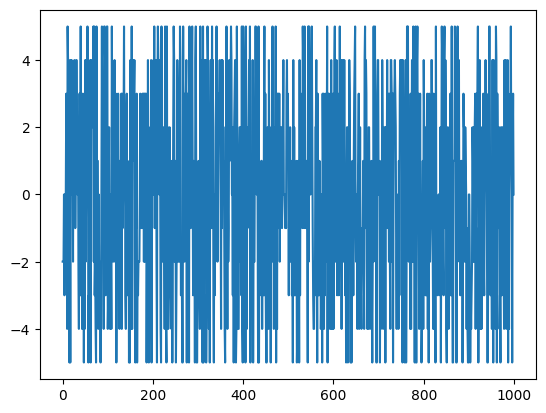

In [18]:
plt.plot(actions)